# 기술통계와 단순회귀분석

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 소수점 3자리 숫자까지 표시
%precision 3

from sklearn import linear_model

In [2]:
pwd

'C:\\Python\\Training\\03.Descriptive_Statistics'

In [3]:
mkdir data

하위 디렉터리 또는 파일 data이(가) 이미 있습니다.


In [4]:
cd ./data

C:\Python\Training\03.Descriptive_Statistics\data


In [5]:
# 웹에서 데이터를 받거나 zip 파일을 다루기 위한 라이브러리
import requests, zipfile
from io import StringIO
import io

In [6]:
# 데이터가 있는 url 지정
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# 데이터를 url에서 받기
r = requests.get(url, stream=True)

# zipfile을 읽어들여 압축 풀기
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [7]:
ls

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 8C04-B11C

 C:\Python\Training\03.Descriptive_Statistics\data 디렉터리

2021-08-05  오후 10:48    <DIR>          .
2021-08-05  오후 10:48    <DIR>          ..
2021-08-05  오후 11:00             3,206 student.txt
2021-08-05  오후 11:00            56,993 student-mat.csv
2021-08-05  오후 11:00               269 student-merge.R
2021-08-05  오후 11:00            93,220 student-por.csv
2021-08-05  오후 10:48           100,485 wine_data.csv
               5개 파일             254,173 바이트
               2개 디렉터리  396,443,852,800 바이트 남음


In [8]:
# 데이터 읽어 들이기
# 구분하는 기호로 ;가 붙어 있다는 점에 주의
student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [9]:
student_data_math.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [10]:
?pd.read_csv

In [11]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

1. school 학교(binary : "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex 성별(binary : "F" - female or "M" - male)

In [12]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [13]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [14]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

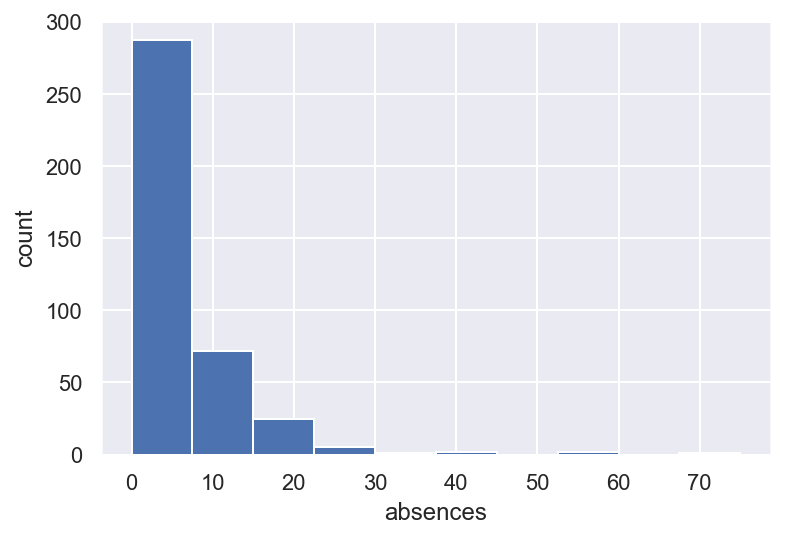

In [15]:
plt.hist(student_data_math['absences'])

plt.xlabel('absences')
plt.ylabel('count')

plt.grid(True)

In [16]:
print('평균값:', student_data_math['absences'].mean())
print('중앙값:', student_data_math['absences'].median())
print('최빈값:', student_data_math['absences'].mode())

평균값: 5.708860759493671
중앙값: 4.0
최빈값: 0    0
dtype: int64


In [17]:
# 분산
student_data_math['absences'].var(ddof=0)

63.887

In [18]:
# 표준편차 σ
student_data_math['absences'].std(ddof=0)

7.993

In [19]:
np.sqrt(student_data_math['absences'].var(ddof=0))

7.992958766400057

In [20]:
# 요약 통계량
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [21]:
# 사분위범위(75% 백분위수 값 - 25% 백분위수 값)
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.0

In [22]:
# 한꺼번에 요약통계량 계산
student_data_math.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

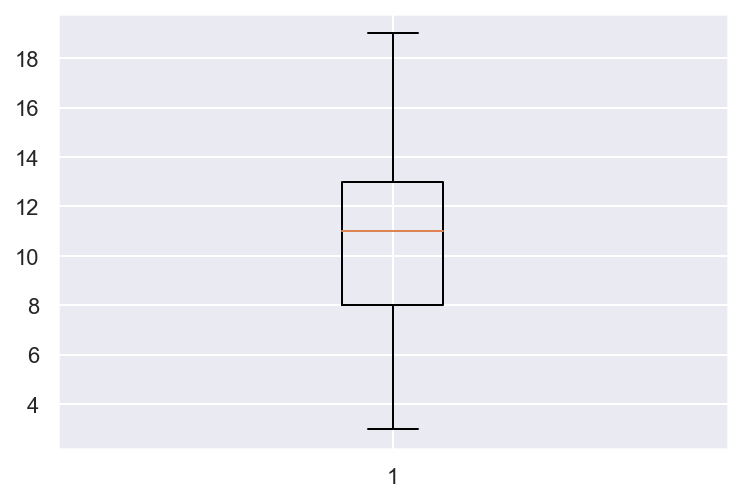

In [23]:
# 박스플롯：G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

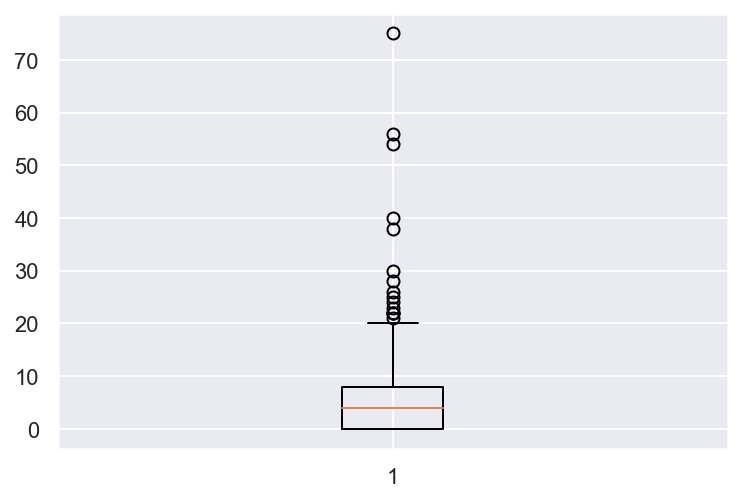

In [24]:
# 박스플롯：결석일 수
plt.boxplot(student_data_math['absences'])
plt.grid(True)

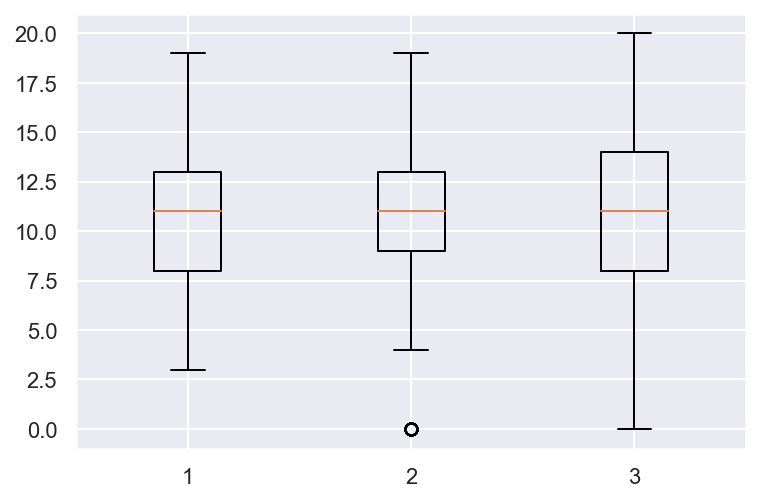

In [25]:
# 박스플롯：G1,G2,G3
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

In [26]:
# 변동계수 : 결석일 수
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.402

In [27]:
student_data_math.std() / student_data_math.mean() 

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

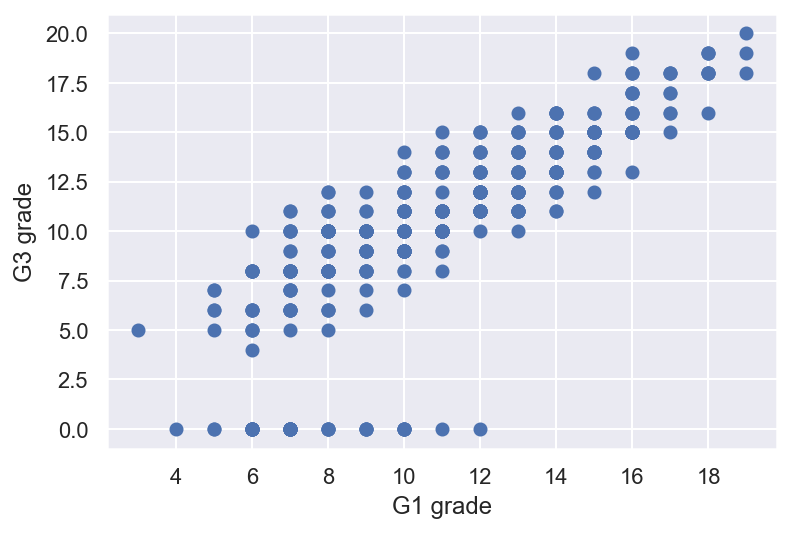

In [28]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [29]:
# 공분산 행렬
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

In [30]:
# 분산
print('G1의 분산:',student_data_math['G1'].var())
print('G3의 분산:',student_data_math['G3'].var())

G1의 분산: 11.017053267364899
G3의 분산: 20.989616397866737


In [31]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

(0.8014679320174143, 9.001430312276074e-90)

In [32]:
# 상관행렬
np.corrcoef([student_data_math['G1'], student_data_math['G3']]) 

array([[1.   , 0.801],
       [0.801, 1.   ]])

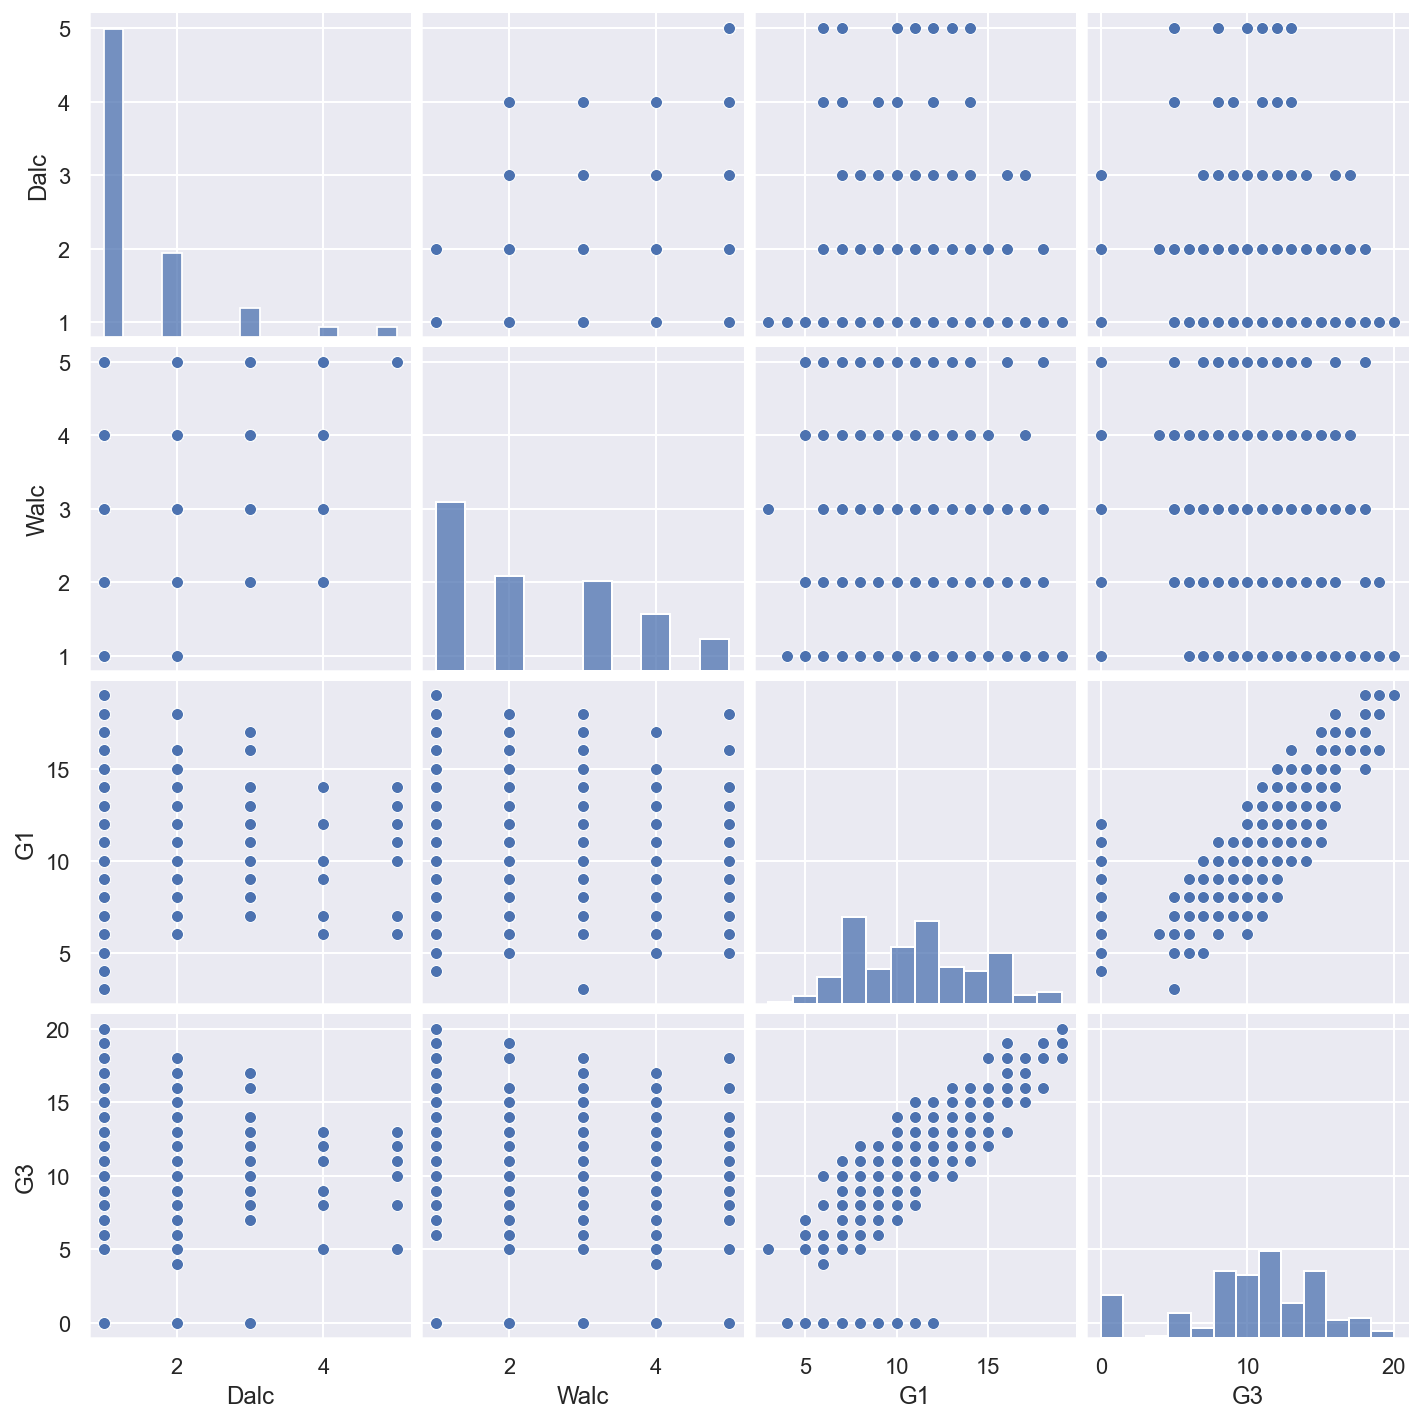

In [33]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [34]:
# 예: 주말에 술을 마시는 사람의 1학기 성적 평균값
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

### [연습문제 1]
다운로드한 포르투갈어 성적 데이터 student-por.csv의 요약 통계량을 계산하세요

In [35]:
student_data_por = pd.read_csv('student-por.csv', sep=';')
student_data_por.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

### [연습문제 2]
아래의 변수를 키 값으로 수학 데이터와 포르투갈어 데이터를 결합하세요. 결합할 때는 양쪽 데이터에 모두 포함된 데이터를 대상으로 하세요(내부결합이라고 합니다).  
결합 후 요약통계량 등을 계산하세요.  
아래의 변수명은 각 데이터에 동일한 변수명이 있어 중복되므로 suffixes=('_math', '_por') 파라미터를 추가해 어느 쪽 데이터인지 알 수 있도록 구분하세요.  

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']

In [36]:
student_data_merge = pd.merge(student_data_math
                              , student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
                                      , 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                              , suffixes=('_math', '_por'))
student_data_merge.describe()

age        Medu        Fedu  traveltime_math  studytime_math  \
count  382.000000  382.000000  382.000000       382.000000      382.000000   
mean    16.586387    2.806283    2.565445         1.442408        2.034031   
std      1.173470    1.086381    1.096240         0.695378        0.845798   
min     15.000000    0.000000    0.000000         1.000000        1.000000   
25%     16.000000    2.000000    2.000000         1.000000        1.000000   
50%     17.000000    3.000000    3.000000         1.000000        2.000000   
75%     17.000000    4.000000    4.000000         2.000000        2.000000   
max     22.000000    4.000000    4.000000         4.000000        4.000000   

       failures_math  famrel_math  freetime_math  goout_math   Dalc_math  ...  \
count     382.000000   382.000000     382.000000  382.000000  382.000000  ...   
mean        0.290576     3.939791       3.222513    3.112565    1.473822  ...   
std         0.729481     0.921620       0.988233    1.131927    0.886229  ...   
min         0.000000     1.000000       1.000000    1.000000    1.000000  ...   
25%         0.000000     4.000000       3.000000    2.000000    1.000000  ...   
50%         0.000000     4.000000       3.000000    3.000000    1.000000  ...   
75%         0.000000     5.000000       4.000000    4.000000    2.000000  ...   
max         3.000000     5.000000       5.000000    5.000000    5.000000  ...   

       famrel_por  freetime_por   goout_por    Dalc_por    Walc_por  \
count  382.000000    382.000000  382.000000  382.000000  382.000000   
mean     3.942408      3.230366    3.117801    1.476440    2.290576   
std      0.908884      0.985096    1.133710    0.886303    1.282577   
min      1.000000      1.000000    1.000000    1.000000    1.000000   
25%      4.000000      3.000000    2.000000    1.000000    1.000000   
50%      4.000000      3.000000    3.000000    1.000000    2.000000   
75%      5.000000      4.000000    4.000000    2.000000    3.000000   
max      5.000000      5.000000    5.000000    5.000000    5.000000   

       health_por  absences_por      G1_por      G2_por      G3_por  
count  382.000000    382.000000  382.000000  382.000000  382.000000  
mean     3.575916      3.672775   12.112565   12.238220   12.515707  
std      1.404248      4.905965    2.556531    2.468341    2.945438  
min      1.000000      0.000000    0.000000    5.000000    0.000000  
25%      3.000000      0.000000   10.000000   11.000000   11.000000  
50%      4.000000      2.000000   12.000000   12.000000   13.000000  
75%      5.000000      6.000000   14.000000   14.000000   14.000000  
max      5.000000     32.000000   19.000000   19.000000   19.000000  

[8 rows x 29 columns]

### [연습문제 3]
연습문제2에서 결합한 데이터에서 Medu, Fedu, G3_math 등의 변수를 선택해 산점도와 히스토그램을 작성해 보세요. 어떤 경향성을 발견할 수 있습니까? 수학 데이터만 갖고 만든 결과와 다른 점이 있습니까?

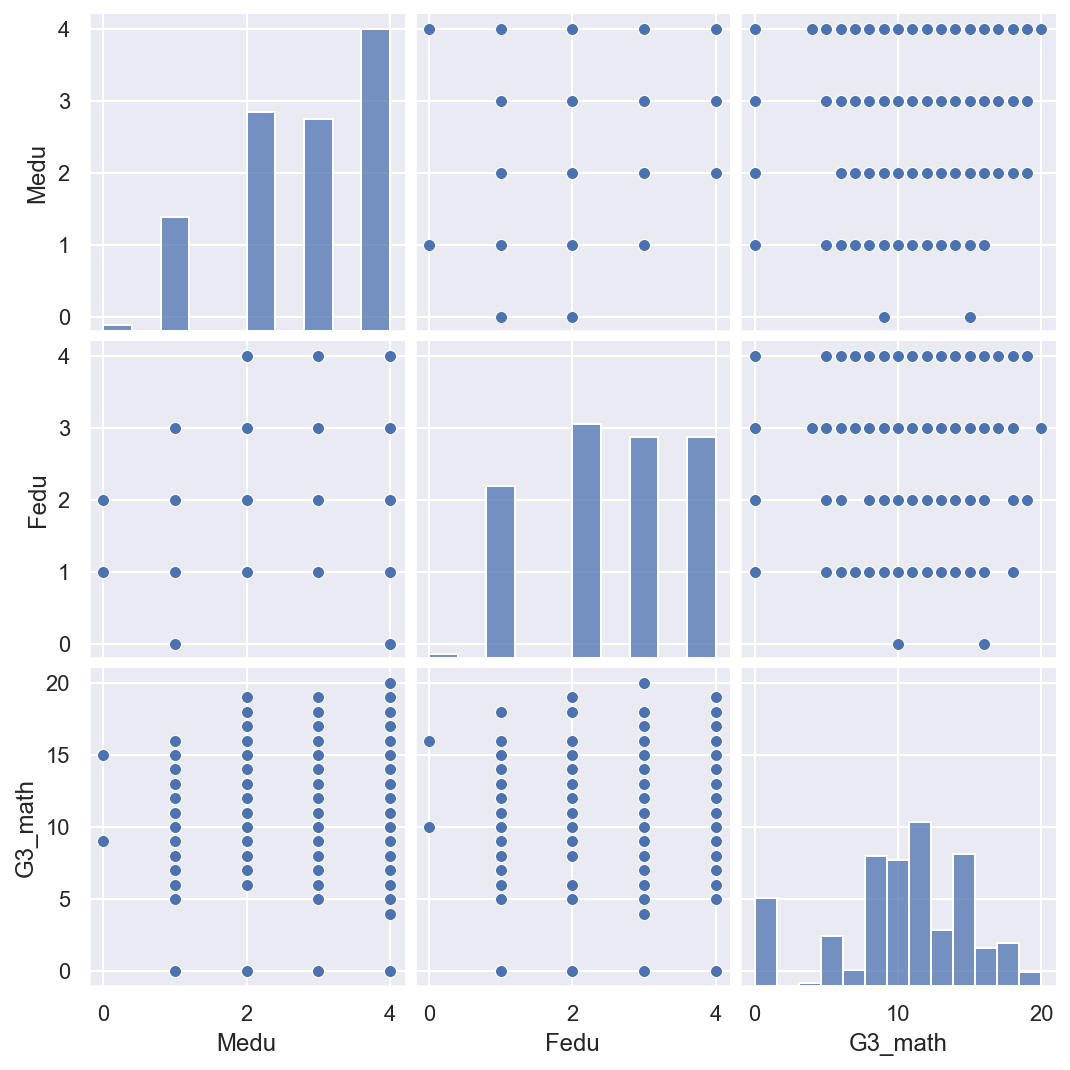

In [37]:
sns.pairplot(student_data_merge[['Medu', 'Fedu', 'G3_math']])
plt.grid(True)

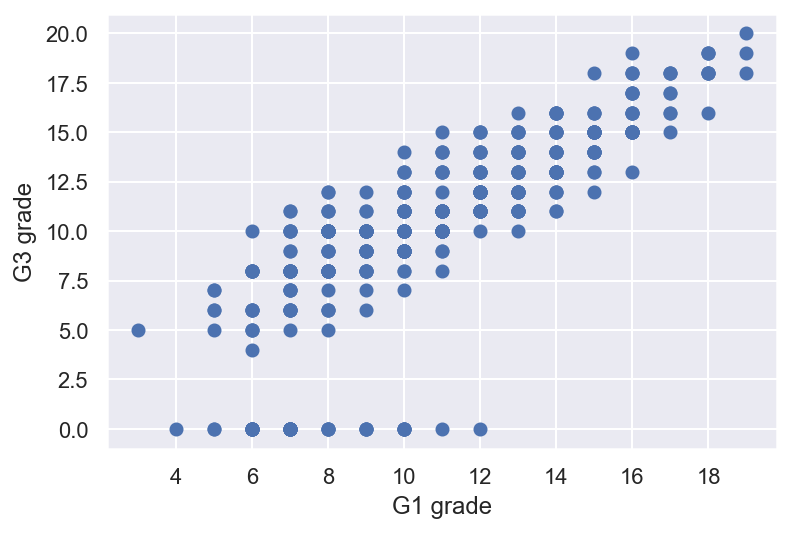

In [38]:
# 산점도
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [39]:
# 선형회귀 인스턴스 생성
reg = linear_model.LinearRegression()

In [40]:
# 설명 변수는 1학기 수학 성적
# loc은 데이터프레임의 행과 열을 지정해서 추출.
# loc[ :, ['G1']]는 G1열의 모든 값을 추출한다
# values로 변경되었으므로 주의
X = student_data_math.loc[:, ['G1']].values

# 목표변수는 최종 수학 성적
Y = student_data_math['G3'].values
 
# 예측 모델 계산. a, b 산출
reg.fit(X, Y)
 
# 회귀계수
print('회귀계수:', reg.coef_)
 
# 절편 
print('절편:', reg.intercept_)

회귀계수: [1.106]
절편: -1.652803828800458


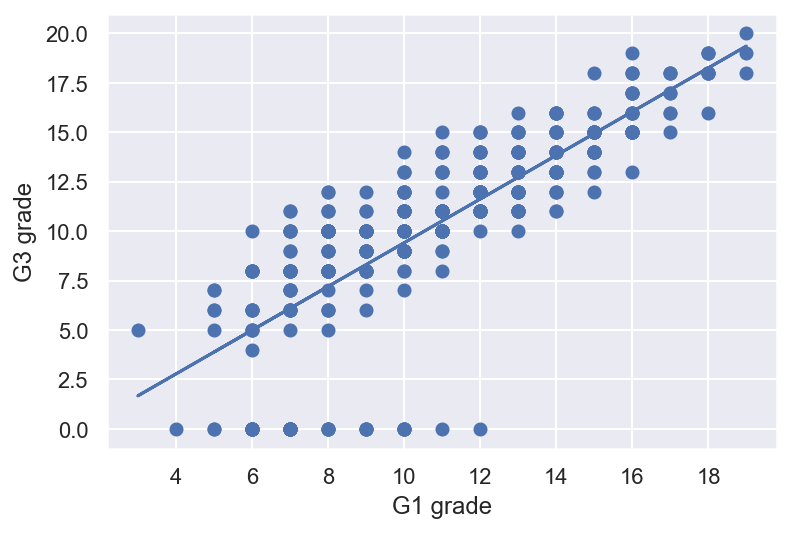

In [41]:
# 앞에서 그린 것과 같은 산점도
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# 위의 그래프에 선형회귀선을 추가
plt.plot(X, reg.predict(X))
plt.grid(True)

In [42]:
# 결정계수, 기여율이라고도 부름
print('결정계수:', reg.score(X, Y))

결정계수: 0.64235084605227


### [연습문제 4]
포르투갈어 성적 데이터 student-por.csv에서 G3이 목표변수, G1이 설명변수인 단순회귀 분석을 하고 회귀계수, 절편, 결정계수를 구하세요.

In [43]:
from sklearn import linear_model

student_data_por = pd.read_csv('student-por.csv', sep=';')

# 선형회귀 인스턴스 생성
reg = linear_model.LinearRegression()

# 설명변수는 "1학기 성적"
X = student_data_por.loc[:, ['G1']].values

# 목표변수는 "최종 성적"
Y = student_data_por['G3'].values
 
# 예측 모델 계산
reg.fit(X, Y)
 
# 회귀계수
print('회귀계수:', reg.coef_)
 
# 절편 
print('절편:', reg.intercept_)

 # 결정계수, 기여율이라고도 부른다
print('결정계수:', reg.score(X, Y))

회귀계수: [0.973]
절편: 0.8203984121064529
결정계수: 0.6829156800171083


### [연습문제 5]
연습문제4 데이터의 산점도와 회귀선을 함께 그리세요.

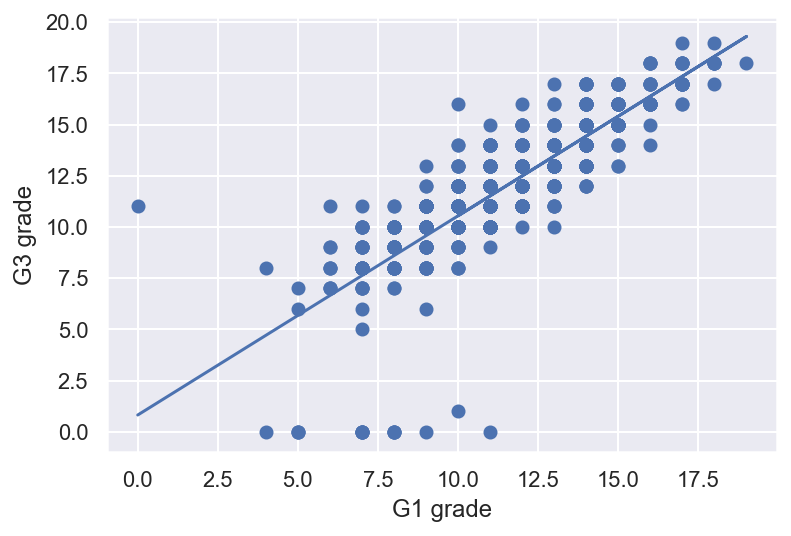

In [44]:
# 산점도
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# 선형회귀선 추가
plt.plot(X, reg.predict(X))
plt.grid(True)

### [연습문제 6]
student-por.csv 데이터를 사용해 G3이 목표변수, absences(결석일 수)가 설명변수인 단순회귀분석을 하고   
회귀계수, 절편, 결정계수를 구하세요. 산점도와 회귀선 그래프를 그려보고 결과에 대해 잘 생각해 봅시다. 

In [45]:
from sklearn import linear_model

# 선형회귀 인스턴스 생성
reg = linear_model.LinearRegression()

# 설명변수는 "결석일 수"
X = student_data_por.loc[:, ['absences']].values

# 목표변수는 "최종 성적"
Y = student_data_por['G3'].values
 
# 예측 모델 구축
reg.fit(X, Y)
 
# 회귀계수
print('회귀계수:', reg.coef_)
 
# 절편
print('절편:', reg.intercept_)

 # 결정계수, 기여율이라고도 부른다
print('결정계수:', reg.score(X, Y))

회귀계수: [-0.064]
절편: 12.138800862687443
결정계수: 0.008350131955637385


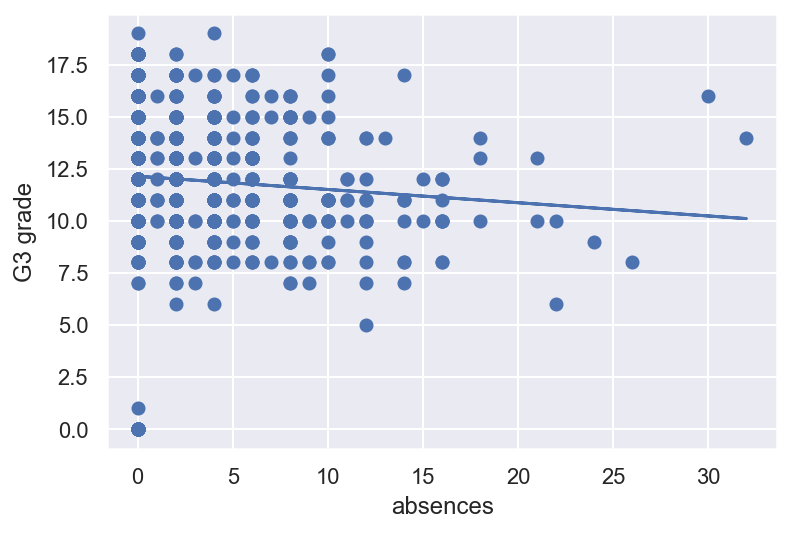

In [46]:
# 산점도
plt.scatter(X, Y)
plt.xlabel('absences')
plt.ylabel('G3 grade')

# 선형회귀선 추가
plt.plot(X, reg.predict(X))
plt.grid(True)

### [통계 기초와 시각화]

1. 요약 통계량(평균 최댓값, 최솟값, 표준편차 등)을 계산하세요. 산출한 통계량을 csv파일로 저장하세요.
2. 각 변수의 분포와 각 변수들의 관계(두 변수끼리만)가 드러날 수 있도록 그래프를 그리세요. 

In [47]:
wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [48]:
file_name = 'wine_data.csv'
wine.to_csv(file_name)

In [49]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

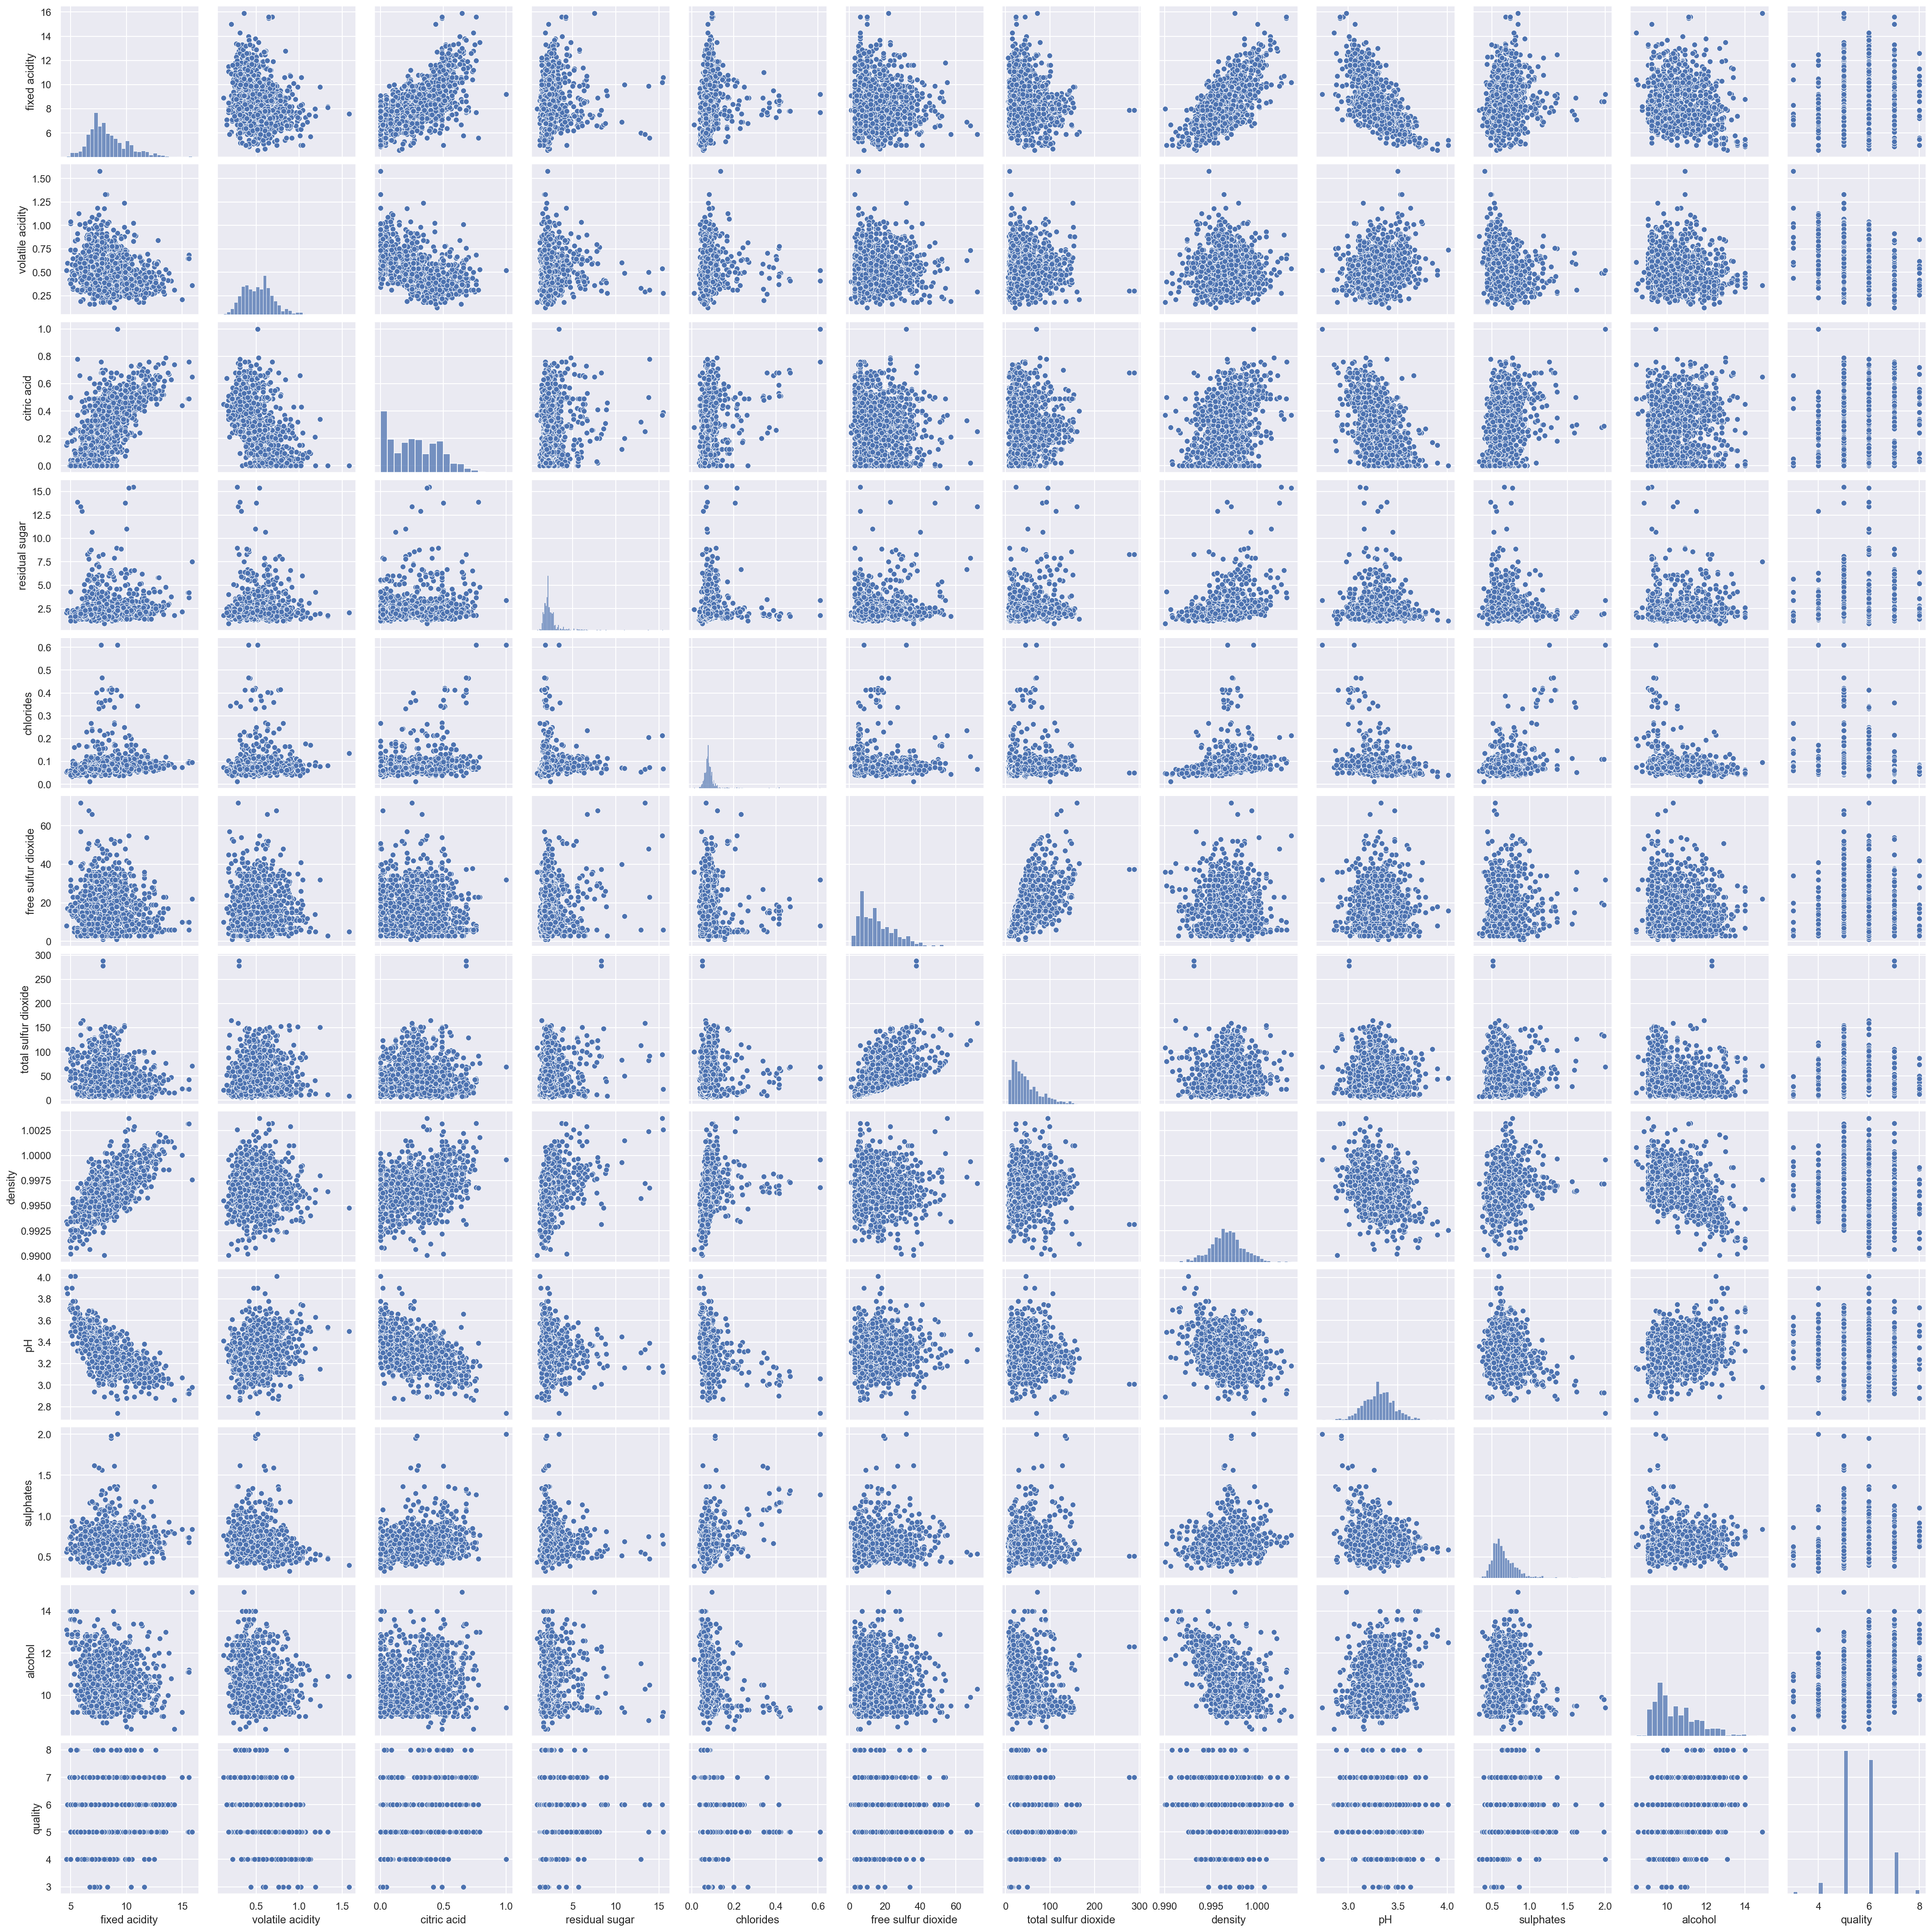

In [50]:
sns.pairplot(wine)

### [로렌츠 곡선과 지니 계수]
1. 1학기 수학 성적 데이터를 성별 오름차순으로 정렬하세요. 가로축은 인원의 누적 비율, 세로축은 1학기 성적 누적 비율을 표시하세요. 이 곡선을 로렌츠 곡선이라고 합니다. 로렌츠 곡선을 성별로 나눠 1학기 수학 성적을 시각화하세요. 

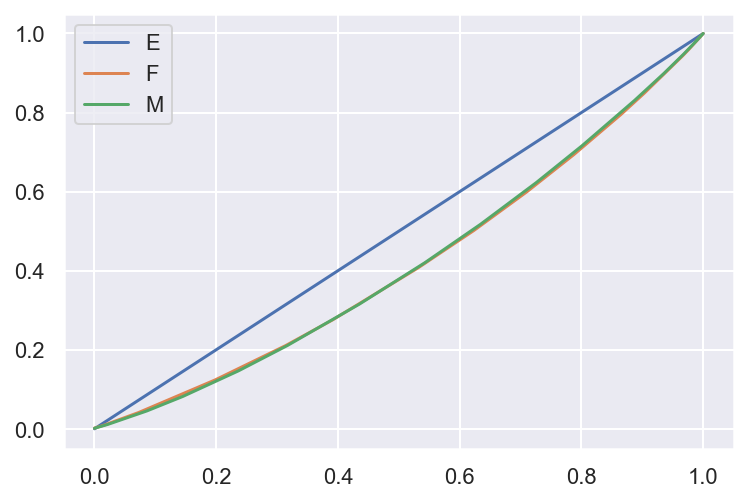

In [51]:
student_data_math_F = student_data_math[student_data_math.sex=='F']
student_data_math_M = student_data_math[student_data_math.sex=='M']

# 오름차순 정렬
sorted_data_G1_F = student_data_math_F.G1.sort_values()
sorted_data_G1_M = student_data_math_M.G1.sort_values()

# 그래프 생성 데이터
len_F = np.arange(len(sorted_data_G1_F))
len_M = np.arange(len(sorted_data_G1_M))

# 로렌츠 곡선
plt.plot(len_F/len_F.max(), len_F/len_F.max(), label='E') 
plt.plot(len_F/len_F.max(), sorted_data_G1_F.cumsum()/sorted_data_G1_F.sum(), label='F')
plt.plot(len_M/len_M.max(), sorted_data_G1_M.cumsum()/sorted_data_G1_M.sum(), label='M')
plt.legend()
plt.grid(True)

2. 불평등 정도를 수치로 나타낸 것을 지니 계수라고 합니다. 이 값은 로렌츠 곡선과 45도 선으로 둘러싸인 부분의 면적의 2배로 정의되며 0에서 1사이의 값입니다. 값이 클수록 불평등과 정도가 커집니다. 지니 계수는 아래 식과 같이 정의합니다. 

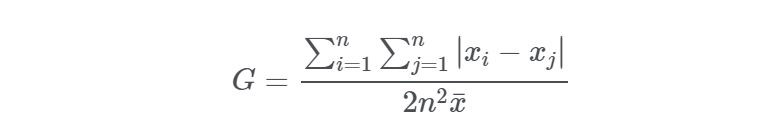

식을 이용해 남녀의 1학기 성적에 대한 지니 계수를 구하세요.

In [52]:
# 지니계수 계산을 위한 함수
def heikinsa(data):
    subt = []
    for i in range(0, len(data)-1):
        for j in range(i+1, len(data)):
            subt.append(np.abs(data[i] - data[j]))
    return float(sum(subt))*2 / (len(data) ** 2)
    
def gini(heikinsa, data):
    return heikinsa / (2 * np.mean(data))

print('남성의 수학 성적 지니계수:', gini(heikinsa(np.array(sorted_data_G1_M)), np.array(sorted_data_G1_M)))
print('여성의 수학 성적 지니계수:', gini(heikinsa(np.array(sorted_data_G1_F)), np.array(sorted_data_G1_F)))

남성의 수학 성적 지니계수: 0.17197351667939903
여성의 수학 성적 지니계수: 0.1723782950865341
